# 부동산 실거래가


- 한국 공개 API에서 제공하는 부동산 거래 데이터를 기반으로 한 데이터 세트입니다.
- 제공 기관 : 국토교통부
- 이용 허락 범위 : 제한 없음
- Open Api : 국토교통부_아파트매매 실거래자료 상세

## 목적

- 오늘날 부동산 불안정, 부동산 폭등, 뉴스에서 접할 수 있는 부동산에 대한 기사 등에서 부동산에 대한 막연한 궁금증이 생겼습니다. <br>이에 따라서 기본적인 아파트 매매가부터 시작해서 아파트 매매가에 영향을 끼치는 그 무언가를 찾고, 더 나아가 예측까지 할 수 있도록<br> 하기 위함입니다. 궁극적인 목표는 아파트 매매가 예측입니다. 

## 데이터 설명

- 지역코드 : 지역을 구분할 수 있는 코드 (구분 단위 : 시) (int)
- 법정동 : 법률로 지정된 행정구역 단위 (str)
- 거래일 : 매매가 성사된 날짜 (datetime)
- 아파트 : 아파트 이름 (str)
- 지번 : 일필지마다에 붙여진 일련번호 (str)
- 전용면적 : 공동주택에서 소유자가 독점하여 사용하는 부분의 면적 (float)
- 층 : 거래된 세대의 층
- 건축년도 : 아파트의 지어진 년도
- 거래금액 : 아파트 거래 매매가
- 법정동시군구코드 : 지역코드와 같음
- 도로명 : 도로명 주소
- 도로명건물본번호코드 : 도로명안에 있는 건물의 본 일련번호
- 도로명건물부번호코드 : 도로명안에 있는 건물의 부 일련번호 
- 도로명일련번호코드 : 도로명 일련번호코드
- 도로명코드 : 도로명의 코드

## 1. 데이터 불러오기

- https://www.data.go.kr/data/15058747/openapi.do
- !pip install PublicDataReader

In [89]:
!pip install matplotlib-venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32067 sha256=abeca046d6ad425871649e31775029c4cd4f772f829f685a44486605406d3672
  Stored in directory: c:\users\rhwns\appdata\local\pip\cache\wheels\82\e4\64\dd790d424818bc2f59c11471a1eee5dc8cfcd3f8ee8c4812fa
Successfully built matplotlib-venn


In [2]:
import PublicDataReader as pdr

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
from pylab import plot, show
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

In [4]:
# 국토교통부 실거래가 Open API 인스턴스 생성
serviceKey = "qfmOYtRt%2BGiAW%2Bf2tJoVocMRnK31N0QeJ7yD%2FzqNELPH1FPtlHB0qOSvkhOwNeTwXGsqsw%2Bdx2cix2WM1pzu7g%3D%3D"

molit = pdr.Transaction(serviceKey)

>>> 아파트매매 실거래자료 조회 서비스가 정상 작동합니다.
>>> 아파트매매 실거래 상세 자료 조회 서비스가 정상 작동합니다.
>>> 아파트 전월세 자료 조회 서비스가 정상 작동합니다.
>>> 아파트 분양권전매 신고 자료 조회 서비스키 미등록 오류입니다.
>>> 오피스텔 매매 신고 조회 서비스키 미등록 오류입니다.
>>> 오피스텔 전월세 신고 조회 서비스키 미등록 오류입니다.
>>> 연립다세대 매매 실거래자료 조회 서비스키 미등록 오류입니다.
>>> 연립다세대 전월세 실거래자료 조회 서비스키 미등록 오류입니다.
>>> 단독/다가구 매매 실거래 조회 서비스키 미등록 오류입니다.
>>> 단독/다가구 전월세 자료 조회 서비스키 미등록 오류입니다.
>>> 토지 매매 신고 조회 서비스키 미등록 오류입니다.
>>> 상업업무용 부동산 매매 신고 자료 조회 서비스키 미등록 오류입니다.


In [5]:
# 지역코드(시흥시) 찾기
result_siheung = molit.CodeFinder("시흥시")
print(result_siheung.head(1))
# 지역코드(광명시) 찾기
result_gwang = molit.CodeFinder("광명시")
print(result_gwang.head(1))
# 지역코드(안산시) 찾기
result_ansan = molit.CodeFinder("안산시")
print(result_ansan)
# 지역코드(부천시) 찾기
result_bucheon = molit.CodeFinder("부천시")
print(result_bucheon.head(1))

      법정동명  법정구코드
0  경기도 시흥시  41390
      법정동명  법정구코드
0  경기도 광명시  41210
                법정동명  법정구코드
0            경기도 안산시  41270
1        경기도 안산시 상록구  41271
2     경기도 안산시 상록구 일동  41271
3     경기도 안산시 상록구 이동  41271
4     경기도 안산시 상록구 사동  41271
5    경기도 안산시 상록구 본오동  41271
6   경기도 안산시 상록구 팔곡이동  41271
7    경기도 안산시 상록구 양상동  41271
8    경기도 안산시 상록구 부곡동  41271
9    경기도 안산시 상록구 성포동  41271
10   경기도 안산시 상록구 월피동  41271
11  경기도 안산시 상록구 팔곡일동  41271
12   경기도 안산시 상록구 건건동  41271
13   경기도 안산시 상록구 사사동  41271
14   경기도 안산시 상록구 수암동  41271
15   경기도 안산시 상록구 장상동  41271
16   경기도 안산시 상록구 장하동  41271
17       경기도 안산시 단원구  41273
18   경기도 안산시 단원구 고잔동  41273
19    경기도 안산시 단원구 와동  41273
20   경기도 안산시 단원구 신길동  41273
21   경기도 안산시 단원구 성곡동  41273
22   경기도 안산시 단원구 원시동  41273
23   경기도 안산시 단원구 목내동  41273
24   경기도 안산시 단원구 초지동  41273
25   경기도 안산시 단원구 원곡동  41273
26   경기도 안산시 단원구 선부동  41273
27  경기도 안산시 단원구 대부동동  41273
28  경기도 안산시 단원구 대부북동  41273
29  경기도 안산시 단원구 대부남동  41273
30   경기도 안산시 단원구 선감동  41273
31   경기도 안산시 단원구 풍도동  41273
32  

In [6]:
# 시흥시 2020년 01월부터 2020년 12월까지 
apart_siheung = molit.DataCollector(molit.AptTradeDetail, 41390, 202001, 202012)
apart_siheung.head()

>>> LAWD_CD : 41390 DEAL_YMD : 202001
>>> LAWD_CD : 41390 DEAL_YMD : 202002
>>> LAWD_CD : 41390 DEAL_YMD : 202003
>>> LAWD_CD : 41390 DEAL_YMD : 202004
>>> LAWD_CD : 41390 DEAL_YMD : 202005
>>> LAWD_CD : 41390 DEAL_YMD : 202006
>>> LAWD_CD : 41390 DEAL_YMD : 202007
>>> LAWD_CD : 41390 DEAL_YMD : 202008
>>> LAWD_CD : 41390 DEAL_YMD : 202009
>>> LAWD_CD : 41390 DEAL_YMD : 202010
>>> LAWD_CD : 41390 DEAL_YMD : 202011
>>> LAWD_CD : 41390 DEAL_YMD : 202012


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,41390,거모동,2020-01-02,동보,612-1,25.120,12,1999,5000,612,...,41390,12700,1,군자로335번길,11,0,41390,0,0.0,4397066
1,41390,거모동,2020-01-02,동보,612-1,25.120,15,1999,5000,612,...,41390,12700,1,군자로335번길,11,0,41390,0,0.0,4397066
2,41390,거모동,2020-01-03,아주4차아파트,1735-2,59.775,8,1993,12000,1735,...,41390,12700,1,도일로135번길,41,0,41390,0,NaN,4397169
3,41390,거모동,2020-01-04,동보,612-1,25.120,15,1999,5000,612,...,41390,12700,1,군자로335번길,11,0,41390,0,0.0,4397066
4,41390,거모동,2020-01-06,녹원,1765-5,84.990,7,1992,16500,1765,...,41390,12700,1,군자로534번안길,18,9,41390,1,0.0,4397080


In [7]:
# 광명시 2020년 01월부터 2020년 12월까지 
apart_gwang = molit.DataCollector(molit.AptTradeDetail, 41210, 202001, 202012)
apart_gwang.head()

>>> LAWD_CD : 41210 DEAL_YMD : 202001
>>> LAWD_CD : 41210 DEAL_YMD : 202002
>>> LAWD_CD : 41210 DEAL_YMD : 202003
>>> LAWD_CD : 41210 DEAL_YMD : 202004
>>> LAWD_CD : 41210 DEAL_YMD : 202005
>>> LAWD_CD : 41210 DEAL_YMD : 202006
>>> LAWD_CD : 41210 DEAL_YMD : 202007
>>> LAWD_CD : 41210 DEAL_YMD : 202008
>>> LAWD_CD : 41210 DEAL_YMD : 202009
>>> LAWD_CD : 41210 DEAL_YMD : 202010
>>> LAWD_CD : 41210 DEAL_YMD : 202011
>>> LAWD_CD : 41210 DEAL_YMD : 202012


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,41210,광명동,2020-01-01,중앙하이츠1,732,56.49,11,1993,29400,732,...,41210,10100,1,도덕로,56,0,41210,1,0.0,3187019
1,41210,광명동,2020-01-01,월드메르디앙,781,84.83,5,2007,55000,781,...,41210,10100,1,목감로,96,0,41210,1,0.0,3187024
2,41210,광명동,2020-01-03,상우2차,734,88.80,5,1995,38300,734,...,41210,10100,1,도덕로28번안길,22,0,41210,1,0.0,4361123
3,41210,광명동,2020-01-03,중앙하이츠2,713,56.49,8,1993,28700,713,...,41210,10100,1,덕단이로,115,0,41210,1,0.0,3187015
4,41210,광명동,2020-01-03,광명한진타운,200-6,84.95,17,1997,61000,200,...,41210,10100,1,광명로,877,0,41210,1,0.0,3000122


In [8]:
# 안산시 2020년 01월부터 2020년 12월까지 
apart_ansan1 = molit.DataCollector(molit.AptTradeDetail, 41271, 202001, 202012)
apart_ansan1.head()
apart_ansan2 = molit.DataCollector(molit.AptTradeDetail, 41273, 202001, 202012)
apart_ansan2.head()

>>> LAWD_CD : 41271 DEAL_YMD : 202001
>>> LAWD_CD : 41271 DEAL_YMD : 202002
>>> LAWD_CD : 41271 DEAL_YMD : 202003
>>> LAWD_CD : 41271 DEAL_YMD : 202004
>>> LAWD_CD : 41271 DEAL_YMD : 202005
>>> LAWD_CD : 41271 DEAL_YMD : 202006
>>> LAWD_CD : 41271 DEAL_YMD : 202007
>>> LAWD_CD : 41271 DEAL_YMD : 202008
>>> LAWD_CD : 41271 DEAL_YMD : 202009
>>> LAWD_CD : 41271 DEAL_YMD : 202010
>>> LAWD_CD : 41271 DEAL_YMD : 202011
>>> LAWD_CD : 41271 DEAL_YMD : 202012
>>> LAWD_CD : 41273 DEAL_YMD : 202001
>>> LAWD_CD : 41273 DEAL_YMD : 202002
>>> LAWD_CD : 41273 DEAL_YMD : 202003
>>> LAWD_CD : 41273 DEAL_YMD : 202004
>>> LAWD_CD : 41273 DEAL_YMD : 202005
>>> LAWD_CD : 41273 DEAL_YMD : 202006
>>> LAWD_CD : 41273 DEAL_YMD : 202007
>>> LAWD_CD : 41273 DEAL_YMD : 202008
>>> LAWD_CD : 41273 DEAL_YMD : 202009
>>> LAWD_CD : 41273 DEAL_YMD : 202010
>>> LAWD_CD : 41273 DEAL_YMD : 202011
>>> LAWD_CD : 41273 DEAL_YMD : 202012


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,41273,고잔동,2020-01-02,네오빌6단지,767,84.500,7,2000,30000,767,...,41273,10100,1,광덕동로,78,0,41273,0,0.0,3191004
1,41273,고잔동,2020-01-02,고잔롯데캐슬골드파크,852,59.980,25,2018,38000,852,...,41273,10100,1,적금로,164,0,41273,0,NaN,3191070
2,41273,고잔동,2020-01-02,단원마을 금강펜테리움,714,68.867,4,2002,29900,714,...,41273,10100,1,광덕서로,43,0,41273,1,0.0,3191005
3,41273,고잔동,2020-01-02,호수공원(대림1),720,117.920,9,2001,42300,720,...,41273,10100,1,광덕서로,19,0,41273,1,0.0,3191005
4,41273,고잔동,2020-01-02,호수공원(대림1),720,117.920,5,2001,47700,720,...,41273,10100,1,광덕서로,19,0,41273,1,0.0,3191005


In [14]:
apart_ansan1 = pd.read_csv("data/ansan1.csv", index_col=0)

apart_ansan2 = pd.read_csv("data/ansan2.csv", index_col=0)

apart_ansan = pd.concat([apart_ansan1, apart_ansan2])
apart_ansan

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,41271,건건동,2020-01-03,건건e-편한세상,987,70.7611,5,2006,29000,987,...,41271,11100,1,건건8길,10.0,0.0,41271.0,0,NaN,4370035.0
1,41271,건건동,2020-01-03,건건e-편한세상,987,84.9356,6,2006,33000,987,...,41271,11100,1,건건8길,10.0,0.0,41271.0,0,NaN,4370035.0
2,41271,건건동,2020-01-04,반월서해,665,59.7900,17,1998,19900,665,...,41271,11100,1,건건5길,10.0,0.0,41271.0,0,NaN,4370032.0
3,41271,건건동,2020-01-04,건건e-편한세상,987,84.9356,5,2006,31950,987,...,41271,11100,1,건건8길,10.0,0.0,41271.0,0,NaN,4370035.0
4,41271,건건동,2020-01-04,건건e-편한세상,987,59.9713,21,2006,27200,987,...,41271,11100,1,건건8길,10.0,0.0,41271.0,0,NaN,4370035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6004,41273,초지동,2020-12-22,주공그린빌14단지,725,40.6200,2,2002,14500,725,...,41273,10700,1,광덕2로,32.0,0.0,41273.0,2,0.0,3191003.0
6005,41273,초지동,2020-12-24,그린빌18,738,39.3000,6,2001,14200,738,...,41273,10700,1,초지2로,14.0,0.0,41273.0,1,0.0,3191078.0
6006,41273,초지동,2020-12-26,초지역메이저타운푸르지오메트로단지,803,48.3659,22,2019,40500,803,...,41273,10700,1,화랑로,170.0,0.0,41273.0,1,NaN,3190080.0
6007,41273,초지동,2020-12-29,주공그린빌12,730,84.9900,11,2003,35000,730,...,41273,10700,1,광덕2로,74.0,0.0,41273.0,2,0.0,3191003.0


In [9]:
# 부천시 2020년 01월부터 2020년 12월까지 
apart_bucheon = molit.DataCollector(molit.AptTradeDetail, 41190, 202001, 202012)
apart_bucheon.head()

>>> LAWD_CD : 41190 DEAL_YMD : 202001
>>> LAWD_CD : 41190 DEAL_YMD : 202002
>>> LAWD_CD : 41190 DEAL_YMD : 202003
>>> LAWD_CD : 41190 DEAL_YMD : 202004
>>> LAWD_CD : 41190 DEAL_YMD : 202005
>>> LAWD_CD : 41190 DEAL_YMD : 202006
>>> LAWD_CD : 41190 DEAL_YMD : 202007
>>> LAWD_CD : 41190 DEAL_YMD : 202008
>>> LAWD_CD : 41190 DEAL_YMD : 202009
>>> LAWD_CD : 41190 DEAL_YMD : 202010
>>> LAWD_CD : 41190 DEAL_YMD : 202011
>>> LAWD_CD : 41190 DEAL_YMD : 202012


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드
0,41190,고강동,2020-01-01,동광모닝스카이2차,305-13,84.98,5,2007,38000,305,...,41190,12100,1,원종로107번길,14,12,41190,1,0.0,4358343
1,41190,고강동,2020-01-02,고강2차,246-5,56.61,2,1986,17300,246,...,41190,12100,1,고강로154번길,37,0,41190,1,0.0,4358011
2,41190,고강동,2020-01-04,건우,307,48.18,1,1986,14900,307,...,41190,12100,1,역곡로455번길,60,0,41190,1,0.0,4358306
3,41190,고강동,2020-01-06,동광모닝스카이2차,305-13,84.98,3,2007,39500,305,...,41190,12100,1,원종로107번길,14,12,41190,1,0.0,4358343
4,41190,고강동,2020-01-07,인성,378,40.95,1,1986,13000,378,...,41190,12100,1,고리울로27번길,7,0,41190,1,0.0,4358026


## 2. 데이터 전처리

#### 필요없는 열 제거

In [19]:
#del apart_siheung["법정동본번코드"]
#del apart_siheung["법정동부번코드"]
#del apart_siheung["법정동읍면동코드"]
#del apart_siheung["법정동지번코드"]
#del apart_siheung["도로명시군구코드"]
#del apart_siheung["도로명지상지하코드"]
del apart_gwang["법정동본번코드"]
del apart_gwang["법정동부번코드"]
del apart_gwang["법정동읍면동코드"]
del apart_gwang["법정동지번코드"]
del apart_gwang["도로명시군구코드"]
del apart_gwang["도로명지상지하코드"]
del apart_bucheon["법정동본번코드"]
del apart_bucheon["법정동부번코드"]
del apart_bucheon["법정동읍면동코드"]
del apart_bucheon["법정동지번코드"]
del apart_bucheon["도로명시군구코드"]
del apart_bucheon["도로명지상지하코드"]
del apart_ansan["법정동본번코드"]
del apart_ansan["법정동부번코드"]
del apart_ansan["법정동읍면동코드"]
del apart_ansan["법정동지번코드"]
del apart_ansan["도로명시군구코드"]
del apart_ansan["도로명지상지하코드"]
apart_siheung

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드
0,41390,거모동,2020-01-02,동보,612-1,25.1200,12,1999,5000,41390,군자로335번길,11,0,0,4397066
1,41390,거모동,2020-01-02,동보,612-1,25.1200,15,1999,5000,41390,군자로335번길,11,0,0,4397066
2,41390,거모동,2020-01-03,아주4차아파트,1735-2,59.7750,8,1993,12000,41390,도일로135번길,41,0,0,4397169
3,41390,거모동,2020-01-04,동보,612-1,25.1200,15,1999,5000,41390,군자로335번길,11,0,0,4397066
4,41390,거모동,2020-01-06,녹원,1765-5,84.9900,7,1992,16500,41390,군자로534번안길,18,9,1,4397080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10726,41390,하중동,2020-12-22,참이슬마을,855,101.2500,2,1999,27000,41390,하중로209번길,9,0,1,4397648
10727,41390,하중동,2020-12-22,유호NPLUSVILLE,878-1,59.4975,9,2004,13800,41390,연성로13번길,11,0,1,4397453
10728,41390,하중동,2020-12-24,관곡마을동아,826-1,60.0000,16,2000,16000,41390,하중로133번길,19,0,1,4397645
10729,41390,하중동,2020-12-24,관곡마을성원,827,59.7300,18,1999,15200,41390,하중로133번길,8,0,1,4397645


In [11]:
# 시흥시 정왕동만 보기
apart_siheung_jeongwang = apart_siheung[apart_siheung["법정동"]=="정왕동"]
apart_siheung_jeongwang

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드
412,41390,정왕동,2020-01-01,시흥배곧신도시 호반베르디움센트럴파크,2485,84.0250,26,2015,41000,41390,배곧3로,27,8,0,3350762
413,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,24,2017,36300,41390,배곧1로,27,15,0,3350760
414,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,22,2017,40000,41390,배곧1로,27,15,0,3350760
415,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,9,2017,34700,41390,배곧1로,27,15,0,3350760
416,41390,정왕동,2020-01-01,한라비발디캠퍼스2차,2564,84.4864,21,2018,41000,41390,배곧1로,27,16,0,3350760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,41390,정왕동,2020-12-29,부성파스텔,1876-3,49.7800,4,1997,16000,41390,옥구천동로,451,0,1,3199041
10615,41390,정왕동,2020-12-30,보성,1877-5,33.4000,1,1998,13000,41390,함송로,63,0,1,3199057
10616,41390,정왕동,2020-12-31,보성,1877-5,33.4000,1,1998,13000,41390,함송로,63,0,1,3199057
10617,41390,정왕동,2020-12-31,호반베르디움 센트로하임,2503,65.9448,11,2017,48000,41390,배곧4로,106,25,1,3350763


In [15]:
apart_siheung = pd.read_csv("data/siheung.csv", index_col=0)
apart_gwang = pd.read_csv("data/gwang.csv", index_col=0)
apart_bucheon = pd.read_csv("data/bucheon.csv", index_col=0)

In [20]:
# 시흥 광명 안산 부천 데이터 합치기
apart_near_city = pd.concat([apart_siheung, apart_ansan, apart_gwang, apart_bucheon])
apart_near_city

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드
0,41390,거모동,2020-01-02,동보,612-1,25.1200,12,1999,5000,41390,군자로335번길,11.0,0.0,0,4397066.0
1,41390,거모동,2020-01-02,동보,612-1,25.1200,15,1999,5000,41390,군자로335번길,11.0,0.0,0,4397066.0
2,41390,거모동,2020-01-03,아주4차아파트,1735-2,59.7750,8,1993,12000,41390,도일로135번길,41.0,0.0,0,4397169.0
3,41390,거모동,2020-01-04,동보,612-1,25.1200,15,1999,5000,41390,군자로335번길,11.0,0.0,0,4397066.0
4,41390,거모동,2020-01-06,녹원,1765-5,84.9900,7,1992,16500,41390,군자로534번안길,18.0,9.0,1,4397080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11383,41190,중동,2020-12-29,중흥마을(주공),1052,39.8700,3,1995,19400,41190,계남로,196.0,0.0,3,3184001.0
11384,41190,중동,2020-12-29,은하마을(주공1),1039,49.6900,14,1995,30200,41190,중동로,301.0,0.0,2,3185015.0
11385,41190,중동,2020-12-30,포도마을(영남),1170,59.9550,3,1994,42700,41190,조마루로,135.0,0.0,4,3184016.0
11386,41190,중동,2020-12-30,프라움시티,1161-2,24.4700,8,2011,12500,41190,소향로,127.0,0.0,1,3184007.0


## 3. 데이터 분석 및 시각화

### 아파트 별 평균(시흥시 정왕동)
- 1. Top 5 , Bottom 5 확인
- 2. 차이 확인(시각화)

#### 1. Top 5, Bottom 5 

In [36]:
### 아파트 별 평균 가격을 알아보자
apart_siheung_jeongwang_mean = pd.pivot_table(apart_siheung_jeongwang,index=["아파트"], aggfunc=np.mean)
apart_siheung_jeongwang_mean = apart_siheung_jeongwang_mean[["거래금액"]]
apart_siheung_jeongwang_mean.round(2)

### 평균 매매가 top 5
apart_s_j_mean_top = apart_siheung_jeongwang_mean.sort_values(by="거래금액", ascending=False).round(2).head(5)
print(apart_s_j_mean_top)

### 평균 매매가 bottom 5
apart_s_j_mean_bottom = apart_siheung_jeongwang_mean.sort_values(by="거래금액").round(2).head(5)
print(apart_s_j_mean_bottom)



                       거래금액
아파트                        
시흥배곧 C1 호반 써밋플레이스  58274.00
시흥배곧한신더휴           52765.12
한라비발디캠퍼스3차         52681.82
호반베르디움 센트로하임       50740.73
시흥배곧 C2 호반 써밋플레이스  49833.33
           거래금액
아파트            
청솔아파트  13532.00
아주     14782.98
동남     15314.56
무진     15851.52
영남4    16226.79


- Top 5
    + 호반 c1 써밋플레이스, 한신 더 휴, 한라3차, 호반3차, 호반 c2 써밋플레이스 으로 나타났다
    + 아파트 모두 배곧신도시 아파트이다
    + 한라비발디캠퍼스3차만 빼고 모두 중심 상가 인접 아파트이다.

- Bottom 5
    + bottom 5 는 청솔, 아주, 동남, 무진, 영남으로 나타났다.

#### 2. 차이 (시각화)

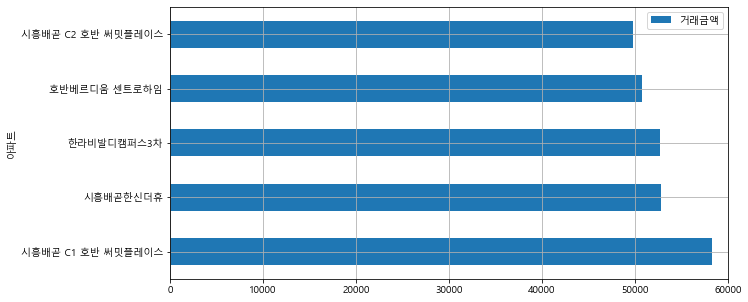

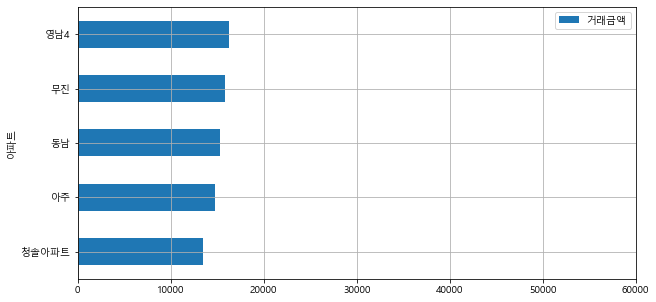

In [142]:
### 막대그래프로 확인
# top 5
apart_s_j_mean_top.plot(kind="barh",stacked=True,figsize=(10, 5), grid=True, xlim=(0, 60000))

# bottom 5
apart_s_j_mean_bottom.plot(kind="barh",stacked=False,figsize=(10, 5), grid=True, xlim=(0, 60000))

+ top 5 간에 차이는 그렇게 커 보이지는 않는다.
+ bottom 5도 마찬가지.
+ 같은 동네임에도 불구하고 최소와 최대가 4억가량의 차이가 보인다. 이유가 뭘까
+ 의심해볼 수 있는 변수 건축년도, 면적(평수), 대중교통, 상가인접 등


### 건축 년도와 거래 금액(시흥시 정왕동)

- 1. 건축년도로 정렬 후 확인
- 2. 막대그래프 확인

#### 1. 건축년도로 정렬 후 확인

In [77]:
apart_siheung_jeongwang_mean_year = pd.pivot_table(apart_siheung_jeongwang,index=["건축년도"], aggfunc=np.mean)
apart_siheung_jeongwang_mean_year = apart_siheung_jeongwang_mean_year[["거래금액"]]


,거래금액
건축년도,
1994,14782.978723
1995,16146.428571
1996,19632.903846
1997,20869.234141
1998,20129.941748


In [76]:
apart_siheung_jeongwang_mean_year.sort_values(by="거래금액", ascending=False)


,거래금액
건축년도,
2018,51009.205021
2017,48785.772358
2015,48257.333333
2019,47321.428571
2016,44088.188406
2000,22166.666667
2002,21606.153846
1997,20869.234141
2001,20744.444444


+ 년도가 올라감에 따라 거래금액이 높아지는 추세를 보이는 것을 알 수 있다.

#### 1. 막대그래프 확인

Text(0, 0.5, '거래 금액')

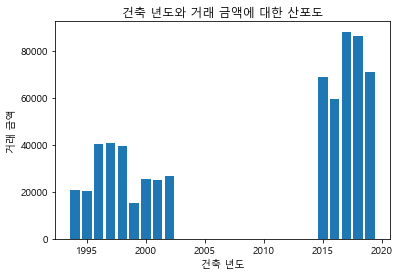

In [144]:
### 막대그래프로 확인
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(apart_siheung_jeongwang["건축년도"], apart_siheung_jeongwang["거래금액"])
ax.set_title("건축 년도와 거래 금액에 대한 산포도")
ax.set_xlabel("건축 년도")
ax.set_ylabel("거래 금액")

+ 확인결과 확실한 차이가 있어 보인다. 정왕동에 한해서 구설과 신설의 매매가 차이는 확연히 있다.
+ 2002 ~ 2014 까지의 아파트 건설은 없다가 15년부터 19년까지 생긴 것은 신도시건설에 의함이다.
+ 궁금한 1996-1998년의 아파트는 2000-2002 아파트보다 비쌀까? 면적, 상권, 역세권, 공원, 학교 

### 전용면적과 거래 금액(시흥시 정왕동)

- 1. 막대 그래프로 확인
- 2. 산포도로 확인

#### 1. 막대그래프로 확인

- 전처리

In [ ]:
# 데이터를 간결하게 하기 위해 소수점 제거
apart_siheung_jeongwang["전용면적"] = apart_siheung_jeongwang["전용면적"].astype(int)
apart_siheung_jeongwang.head()

Text(0, 0.5, '거래금액')

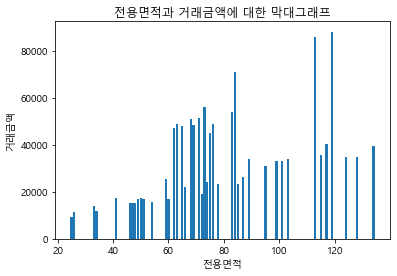

In [151]:
# 막대그래프
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(apart_siheung_jeongwang["전용면적"], apart_siheung_jeongwang["거래금액"])
ax.set_title("전용면적과 거래금액에 대한 막대그래프")
ax.set_xlabel("전용면적")
ax.set_ylabel("거래금액")

+ 전용 면적이 커짐에 따라 거래금액도 올라가는 것을 확인할 수 있다
+ 하지만 전용면적이 크다고 해서 거래 금액이 무작정 높은 것으로는 볼 수 없다.
+ 그렇다면 왜 전용면적이 상대적으로 20-30 정도 차이가 나는데 거래 금액이 더 높을까?
+ 의심되는 변수는 신설 여부, 아파트 브랜드, 근처 복지시설, 상권, 역세권

#### 2. 산점도로 확인

Text(0, 0.5, '거래 금액')

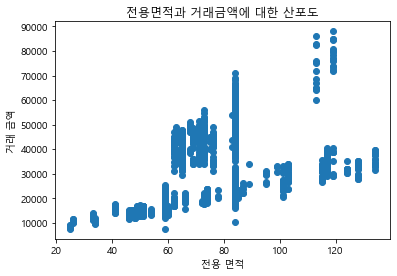

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(apart_siheung_jeongwang["전용면적"], apart_siheung_jeongwang["거래금액"])
ax.set_title("전용면적과 거래금액에 대한 산포도")
ax.set_xlabel("전용 면적")
ax.set_ylabel("거래 금액")

+ 건축년도에따라 거래금액이 증가하는 것을 확인할 수 있다.

### 신설 여부에 따른 전용면적과 거래금액
- 기준 15년 이후 신축 나머지 구축

#### 1. 전처리

In [18]:
# 신축은 1 구축은 0으로 표현
# apart_siheung_jeongwang["신축여부"] = np.where(apart_siheung_jeongwang["건축년도"]<=2002, 0, 1)
apart_siheung_jeongwang.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드,신축여부
412,41390,정왕동,2020-01-01,시흥배곧신도시 호반베르디움센트럴파크,2485,84.0250,26,2015,41000,41390,배곧3로,27,8,0,3350762,1
413,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,24,2017,36300,41390,배곧1로,27,15,0,3350760,1
414,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,22,2017,40000,41390,배곧1로,27,15,0,3350760,1
415,41390,정왕동,2020-01-01,한라비발디캠퍼스,2566,71.8740,9,2017,34700,41390,배곧1로,27,15,0,3350760,1
416,41390,정왕동,2020-01-01,한라비발디캠퍼스2차,2564,84.4864,21,2018,41000,41390,배곧1로,27,16,0,3350760,1


#### 2. 산점도로 확인

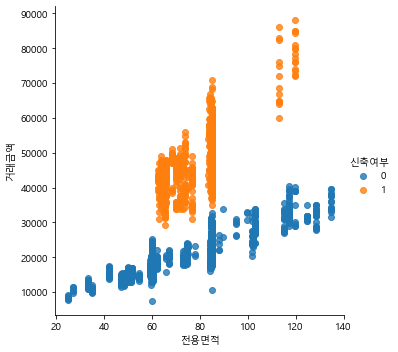

In [19]:
sns.lmplot(x="전용면적", y="거래금액", data=apart_siheung_jeongwang, fit_reg=False, hue="신축여부")

+ 그래프를 보면 구축과 신축 모두 전용면적과 거래금액은 양의 상관관계에 있는 것을 알 수 있다.
+ 그렇다면 전용면적이 비슷한 구간에서 가격 차이가 나는 이유가 뭘까?
+ 층, 상가 인접,  


### 지난 1년 간 호반베르디움 센트로하임의 거래 현황(시흥시 정왕동)
+ 1. 전용면적 84 
+ 2. 전용면적 85

In [100]:
hoban_centro = apart_siheung_jeongwang[apart_siheung_jeongwang["아파트"]=="호반베르디움 센트로하임"]
hoban_centro

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드
421,41390,정왕동,2020-01-02,호반베르디움 센트로하임,2503,84,23,2017,41600,41390,배곧4로,106,25,1,3350763
437,41390,정왕동,2020-01-03,호반베르디움 센트로하임,2503,65,10,2017,35500,41390,배곧4로,106,25,1,3350763
438,41390,정왕동,2020-01-03,호반베르디움 센트로하임,2503,84,2,2017,41000,41390,배곧4로,106,25,1,3350763
439,41390,정왕동,2020-01-03,호반베르디움 센트로하임,2503,84,16,2017,44800,41390,배곧4로,106,25,1,3350763
453,41390,정왕동,2020-01-04,호반베르디움 센트로하임,2503,84,13,2017,43000,41390,배곧4로,106,25,1,3350763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,41390,정왕동,2020-12-19,호반베르디움 센트로하임,2503,84,13,2017,56500,41390,배곧4로,106,25,1,3350763
10533,41390,정왕동,2020-12-19,호반베르디움 센트로하임,2503,84,3,2017,57000,41390,배곧4로,106,25,1,3350763
10534,41390,정왕동,2020-12-19,호반베르디움 센트로하임,2503,84,21,2017,58500,41390,배곧4로,106,25,1,3350763
10615,41390,정왕동,2020-12-31,호반베르디움 센트로하임,2503,65,11,2017,48000,41390,배곧4로,106,25,1,3350763


#### 1. 전용면적 84

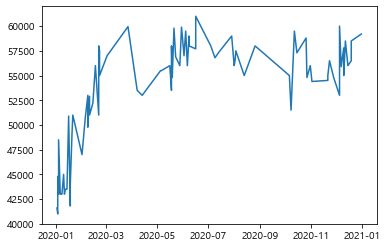

In [102]:
hoban_centro_84 = hoban_centro[hoban_centro["전용면적"]==84]

plot(hoban_centro_84["거래일"], hoban_centro_84["거래금액"])

+ 2020년 1월 부터 2020 3월말까지 증가하는 추세를 보이다가  증가 추세가 없어진 것을 확인할 수 있다.

#### 2. 전용면적 65

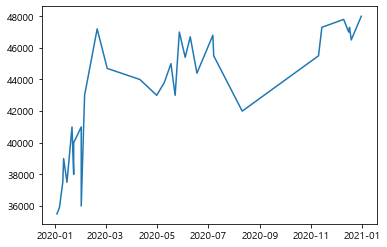

In [104]:
hoban_centro_65 = hoban_centro[hoban_centro["전용면적"]==65]

plot(hoban_centro_65["거래일"], hoban_centro_65["거래금액"])

+ 2020년 1월부터 2020년 3월까지 급등하고 그 후 자리를 잡은듯 하였으나 가격이 오르락 내리락 하는 것을 확인할 수 있다. 

### 층에 따른 거래금액 (호반베르디움 센트로하임)(시흥시 정왕동)

#### 1. 전용면적 84 

Text(0, 0.5, '거래금액')

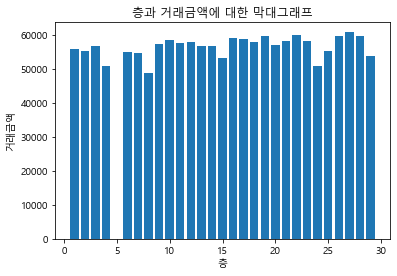

In [109]:
# 막대그래프
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(hoban_centro_84["층"], hoban_centro_84["거래금액"])
ax.set_title("층과 거래금액에 대한 막대그래프")
ax.set_xlabel("층")
ax.set_ylabel("거래금액")

+ 로얄층은은 정말 가격차이가 많이 날까? 에 대한 답변이 있는 그래프이다
+ 그래프상 로얄층은 가격에 영향을 주지 않는 것 같다.

#### 2. 전용면적 65

Text(0, 0.5, '거래금액')

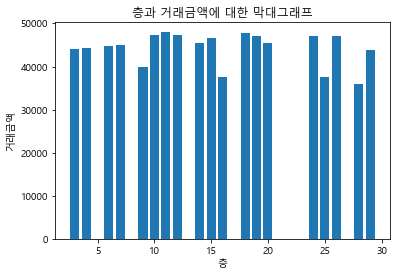

In [110]:
# 막대그래프
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.bar(hoban_centro_65["층"], hoban_centro_65["거래금액"])
ax.set_title("층과 거래금액에 대한 막대그래프")
ax.set_xlabel("층")
ax.set_ylabel("거래금액")

+ 로얄층은은 정말 가격차이가 많이 날까? 에 대한 답변이 있는 그래프이다
+ 그래프상 로얄층은 가격에 영향을 주지 않는 것 같다.

### 시흥시에서 동으로 구분하여 거래금액의 평균을 비교해보자

+ Top 5, Bottom 5
+ 시각화 (막대그래프)

In [119]:
apart_siheung_dong_mean = pd.pivot_table(apart_siheung,index=["법정동"], aggfunc=np.mean)
apart_siheung_dong_mean = apart_siheung_dong_mean[["거래금액"]]

#### 1. Top5

In [121]:
apart_siheung_dong_mean.sort_values(by="거래금액", ascending=False).head(5)

,거래금액
법정동,
광석동,58500.000000
목감동,51255.000000
조남동,48684.275229
산현동,47254.895105
능곡동,42452.823920


In [135]:
# 처음들어보는 동의 평균 가격이 제일 높아 의아함
# 그래서 확인
apart_siheung[apart_siheung["법정동"]=="광석동"]
# 거래 내용이 2개밖에 없고 아파트가 1개임 따라서 평균 거래금액이 가장 높다고 하기 어려움


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,법정동시군구코드,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명일련번호코드,도로명코드
147,41390,목감동,2020-01-08,호반베르디움더프라임(1차),406,69.6356,17,2017,55700,41390,배미골길,23,0,1,4853500
148,41390,목감동,2020-01-11,호반베르디움더프라임(1차),406,84.6742,6,2017,62000,41390,배미골길,23,0,1,4853500
149,41390,목감동,2020-01-16,동우,239-15,47.0400,4,1986,20400,41390,동서로,1096,4,6,3199013
150,41390,목감동,2020-01-19,호반베르디움더프라임(1차),406,84.6742,23,2017,59500,41390,배미골길,23,0,1,4853500
151,41390,목감동,2020-01-31,명신,239-3,55.8900,2,1986,18000,41390,동서로,1094,0,6,3199013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9278,41390,목감동,2020-11-20,호반베르디움더프라임(1차),406,84.6742,10,2017,70300,41390,배미골길,23,0,1,4853500
9279,41390,목감동,2020-11-24,호반베르디움더프라임(1차),406,69.6356,22,2017,62700,41390,배미골길,23,0,1,4853500
10064,41390,목감동,2020-12-02,"청도아파트A,B동",202-14,52.8300,5,1986,30000,41390,동서로,1102,0,6,3199013
10065,41390,목감동,2020-12-05,호반베르디움더프라임(1차),406,84.6742,4,2017,75700,41390,배미골길,23,0,1,4853500


#### 2. Bottom5

In [122]:
apart_siheung_dong_mean.sort_values(by="거래금액").head(5)

,거래금액
법정동,
거모동,11178.421053
매화동,13978.650794
포동,15585.547945
월곶동,20245.595855
하상동,20553.935361


### 법정동 별로 전용면적과 거래금액

#### 산포도 확인

Text(0, 0.5, '거래 금액')

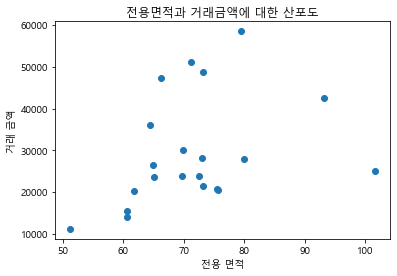

In [140]:
apart_siheung_dong_mean1 = pd.pivot_table(apart_siheung,index=["법정동"], aggfunc=np.mean)
apart_siheung_dong_mean1 = apart_siheung_dong_mean1[["전용면적","거래금액"]]
apart_siheung_dong_mean1

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(apart_siheung_dong_mean1["전용면적"], apart_siheung_dong_mean1["거래금액"])
ax.set_title("전용면적과 거래금액에 대한 산포도")
ax.set_xlabel("전용 면적")
ax.set_ylabel("거래 금액")

+ 양의 관계를 띄는 것 같지만 전용면적과 거래금액은 큰 관계가 없어보임

In [ ]:
### 해야할 것
# 인근 시와 비교하기 광명, 부천, 안산
    # 비교 후 변수 생각하기
# 아파트 매매가에 영향을 끼치는 변수 데이터 수집
    # 동네 복지시설, 주변환경, 상권, 공원, 등 생각해서 데이터 수집하기
    # 동별로 할지 인근 시별로 할지 
# 그 변수로 분석실시
# 기간을 더 늘려 월별 분석도 해보기
# 정리해서 보고서 만들기

In [21]:
# 저장
apart_siheung.to_csv("data/siheung.csv", encoding="utf-8")
apart_gwang.to_csv("data/gwang.csv", encoding="utf-8")
apart_bucheon.to_csv("data/bucheon.csv", encoding="utf-8")
apart_ansan1.to_csv("data/ansan1.csv", encoding="utf-8")
apart_ansan2.to_csv("data/ansan2.csv", encoding="utf-8")

